In [ ]:
'''
sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. 
Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. 
Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, 
and regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, 
and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), 
or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: 
standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, 
since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, 
including handwritten digits or satellite image scenes. 
Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either Numpy arrays or scipy.sparse matrices as input. For dense matrices, 
a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

There are many learning routines which rely on nearest neighbors at their core. One example is kernel density estimation, 
discussed in the density estimation section.
'''

In [1]:
import csv
import sys
import os
import pandas as pd
import numpy as np
from numpy import *
from datetime import datetime
from operator import itemgetter
from collections import defaultdict

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

#plt.style.use('ggplot')
df=pd.read_excel('H:/lottery/ssq.xls',sheet_name='data')
df.columns=['num', 'date', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'b', 'sr1', 'sr2',
       'sr3', 'sr4', 'sr5', 'sr6', 'sales_volume', 'pool', 'first', 'bonus1', 'second', 'bonus2',
       'third', 'bonus3', 'fourth', 'bonus4', 'fifth', 'bonus5', 'sexth', 'bonus6']
#df.tail()
X = df[[ 'b']]
X.columns=['sr0']
X.tail()

,sr0
2181,2
2182,11
2183,11
2184,11
2185,4


In [2]:
starttime = datetime.now()
num_rows = X.shape[0]
def creat_datasets(X, features ):
    df_ = pd.DataFrame(columns = list(range(0, features)))
    index = 0
    for i in range(features, num_rows+1):
        df_.loc[index] = X[col][i-features: i].reset_index(drop = True)
        index += 1
    return df_

for col in X.columns :
    locals()['df_'+ str(col)] = creat_datasets(X, 200)
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
# 至此据集完成

12 seconds


In [3]:
def split_c(df_):
    # choose frequence >10 samples
    #df = df_[df_[99].isin(df_[99].groupby(df_[99]).count()[df_[99].groupby(df_[99]).count()>30].index)]
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values #dataframe.as_matrix() 
    ''' why need astpye(int/str), otherwise error with y_type=object??'''
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    return X_, y_, X_train, X_test, y_train, y_test
def score_c(clf, cv=3):    
    precision = cross_val_score(clf, X_, y_, cv=cv, scoring='precision_weighted')
    recall = cross_val_score(clf, X_, y_, cv=cv, scoring='recall_weighted')
    fls = cross_val_score(clf, X_, y_, cv=cv, scoring='f1_weighted')
    return precision, recall, fls

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)'''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def total_classifier(pipe_LinearSVC, param_LinearSVC):
    X_ = df_.iloc[:, : -1].values
    y_ = df_.iloc[:, -1].astype(int).values.reshape(-1)
    #dataframe.as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
    
    grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
    #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
    grid_.fit(X_train, y_train)
    # evaluation for best parameters
    precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
    recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
    fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')
    new = grid_.predict(df_.iloc[-1,1: ].values.reshape(1,-1))
    np.set_printoptions(precision=4)
    print('df_R'+ str(i), new, 'precison:', precision, 'recall:', recall, 'f1:', fls)
    print(grid_.best_estimator_)
    
    class_names = np.unique(y_train)
    y_pred = grid_.predict(X_test)
    report = classification_report(y_test, y_pred)
    c = np.sum(y_test == y_pred)
    print(report)
    print('n_accuracy:', c)
    #print(grid_.scorer_, grid_.best_score_, grid_.cv_results_)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()

In [ ]:
################    1    Regressor
################    1.1  Nearest Neighbors KNeighborsRegressor
'''
Despite its simplicity, it has been successful in a large number of problems, including handwritten digits or satellite image scenes. 
Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.


'''

In [4]:
from sklearn.neighbors import KNeighborsRegressor

starttime = datetime.now()

pipe_KNeighborsReg = Pipeline([('clf', KNeighborsRegressor(n_jobs=-1))])
param_KNeighborsReg = {'clf__n_neighbors': [5, 10, ], #default = 5; Number of neighbors to use by default for kneighbors querie
                       'clf__weights': ['uniform', 'distance'], #default = uniform;  weight function used in prediction
                       #‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                       #‘distance’ : weight points by the inverse of their distance. in this case, 
                       #               closer neighbors of a query point will have a greater influence than neighbors which are further away.
                       #[callable]: a function which accepts an array of distances, returns an array of the same shape containing the weights.
                       'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], #default='auto'; Algorithm used to compute the nearest neighbors:
                       #‘ball_tree’ will use BallTree
                       #‘kd_tree’ will use KDTree
                       #‘brute’ will use a brute-force search.
                       #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
                       #Note:::: fitting on sparse input will override the setting of this parameter, using brute force.
                       'clf__leaf_size': [30, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__p': [2, ], #default=2; Power parameter for the Minkowski metric.
                       #p = 1: using manhattan_distance (l1); p = 2: euclidean_distance (l2); arbitrary p, minkowski_distance (l_p)
                       'clf__metric': ['minkowski', ], #default=minkowski; the distance metric to use for the tree
                       #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
                       #See the documentation of the DistanceMetric class for a list of available metrics.
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_regressor(pipe_KNeighborsReg, param_KNeighborsReg)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

Fitting 3 folds for each of 16 candidates, totalling 48 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
D:\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
D:\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000000002179B70, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000000002179B70, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
D:\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
D:\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
D:\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
D:\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 2, 6, 7, 34, 59, 906228, tzinfo=datetime.timezone.utc), 'msg_id': 'C7633557415F46DE846F40CFA6939744', 'msg_type': 'execute_request', 'session': '8E760C2E903249808FAFB9ACF26EE7AD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'C7633557415F46DE846F40CFA6939744', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'8E760C2E903249808FAFB9ACF26EE7AD']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 2, 6, 7, 34, 59, 906228, tzinfo=datetime.timezone.utc), 'msg_id': 'C7633557415F46DE846F40CFA6939744', 'msg_type': 'execute_request', 'session': '8E760C2E903249808FAFB9ACF26EE7AD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'C7633557415F46DE846F40CFA6939744', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'8E760C2E903249808FAFB9ACF26EE7AD'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 2, 6, 7, 34, 59, 906228, tzinfo=datetime.timezone.utc), 'msg_id': 'C7633557415F46DE846F40CFA6939744', 'msg_type': 'execute_request', 'session': '8E760C2E903249808FAFB9ACF26EE7AD', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'C7633557415F46DE846F40CFA6939744', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="from sklearn.neighbors import KNeighborsRegresso...ndtime - starttime\nprint(Time.seconds, 'seconds')", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.For object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-4-35ebae52eab4>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 48ccac8, execution_co..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000000A234D20, file "<ipython-input-4-35ebae52eab4>", line 28>
        result = <ExecutionResult object at 48ccac8, execution_co..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000000A234D20, file "<ipython-input-4-35ebae52eab4>", line 28>, result=<ExecutionResult object at 48ccac8, execution_co..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000000A234D20, file "<ipython-input-4-35ebae52eab4>", line 28>
        self.user_global_ns = {'ALLOW_THREADS': 1, 'BUFSIZE': 8192, 'CLIP': 0, 'ComplexWarning': <class 'numpy.core.numeric.ComplexWarning'>, 'DataSource': <class 'numpy.lib._datasource.DataSource'>, 'ERR_CALL': 3, 'ERR_DEFAULT': 521, 'ERR_IGNORE': 0, 'ERR_LOG': 5, 'ERR_PRINT': 4, ...}
        self.user_ns = {'ALLOW_THREADS': 1, 'BUFSIZE': 8192, 'CLIP': 0, 'ComplexWarning': <class 'numpy.core.numeric.ComplexWarning'>, 'DataSource': <class 'numpy.lib._datasource.DataSource'>, 'ERR_CALL': 3, 'ERR_DEFAULT': 521, 'ERR_IGNORE': 0, 'ERR_LOG': 5, 'ERR_PRINT': 4, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Administrator\A ball\<ipython-input-4-35ebae52eab4> in <module>()
     25                        #See the documentation of the DistanceMetric class for a list of available metrics.
     26                        'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
     27                       }
     28 for i in range(0,1):
     29     df_ =  locals()['df_sr'+ str(i)]
---> 30     total_f(pipe_KNeighborsReg, param_KNeighborsReg)
     31 
     32 endtime = datetime.now()
     33 Time = endtime - starttime
     34 print(Time.seconds, 'seconds')

...........................................................................
C:\Users\Administrator\A ball\<ipython-input-3-67b72611a958> in total_f(pipe_LinearSVC=Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))]), param_LinearSVC={'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'clf__leaf_size': [30], 'clf__metric': ['minkowski'], 'clf__metric_params': [None], 'clf__n_neighbors': [5, 10], 'clf__p': [2], 'clf__weights': ['uniform', 'distance']})
     52     #dataframe.as_matrix()
     53     X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=14)
     54     
     55     grid_=GridSearchCV(pipe_LinearSVC, param_LinearSVC, n_jobs=-1, verbose=1, scoring='accuracy')
     56     #default=None, and the default scorer of DT is accuracy. see also DecisionTreeClassifier.score(X, y)
---> 57     grid_.fit(X_train, y_train)
     58     # evaluation for best parameters
     59     precision = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='precision_weighted')
     60     recall = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='recall_weighted')
     61     fls = cross_val_score(grid_.best_estimator_, X_, y_, cv=3, scoring='f1_weighted')

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...score=True,
       scoring='accuracy', verbose=1), X=array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...
       [11, 1, 4, ..., 2, 10, 2]], dtype=object), y=array([ 2, 16,  1, ..., 14, 14,  9]), groups=None)
    940 
    941         groups : array-like, with shape (n_samples,), optional
    942             Group labels for the samples used while splitting the dataset into
    943             train/test set.
    944         """
--> 945         return self._fit(X, y, groups, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...core=True,
       scoring='accuracy', verbose=1)>
        X = array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...
       [11, 1, 4, ..., 2, 10, 2]], dtype=object)
        y = array([ 2, 16,  1, ..., 14, 14,  9])
        groups = None
        self.param_grid = {'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'clf__leaf_size': [30], 'clf__metric': ['minkowski'], 'clf__metric_params': [None], 'clf__n_neighbors': [5, 10], 'clf__p': [2], 'clf__weights': ['uniform', 'distance']}
    946 
    947 
    948 class RandomizedSearchCV(BaseSearchCV):
    949     """Randomized search on hyper parameters.

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ...score=True,
       scoring='accuracy', verbose=1), X=array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...
       [11, 1, 4, ..., 2, 10, 2]], dtype=object), y=array([ 2, 16,  1, ..., 14, 14,  9]), groups=None, parameter_iterable=<sklearn.model_selection._search.ParameterGrid object>)
    559                                   fit_params=self.fit_params,
    560                                   return_train_score=self.return_train_score,
    561                                   return_n_test_samples=True,
    562                                   return_times=True, return_parameters=True,
    563                                   error_score=self.error_score)
--> 564           for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.model_selection._search.ParameterGrid object>
    565           for train, test in cv_iter)
    566 
    567         # if one choose to see train score, "out" will contain train score info
    568         if self.return_train_score:

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Feb  6 15:35:03 2018
PID: 8588                             Python 3.6.1: D:\Anaconda3\python.exe
...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))]), array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...
       [11, 1, 4, ..., 2, 10, 2]], dtype=object), array([ 2, 16,  1, ..., 14, 14,  9]), make_scorer(accuracy_score), array([ 530,  531,  532, ..., 1586, 1587, 1588]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...20, 521, 522, 523, 524, 525, 526, 527, 528, 529]), 1, {'clf__algorithm': 'auto', 'clf__leaf_size': 30, 'clf__metric': 'minkowski', 'clf__metric_params': None, 'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))]), array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...
       [11, 1, 4, ..., 2, 10, 2]], dtype=object), array([ 2, 16,  1, ..., 14, 14,  9]), make_scorer(accuracy_score), array([ 530,  531,  532, ..., 1586, 1587, 1588]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...20, 521, 522, 523, 524, 525, 526, 527, 528, 529]), 1, {'clf__algorithm': 'auto', 'clf__leaf_size': 30, 'clf__metric': 'minkowski', 'clf__metric_params': None, 'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))]), X=array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...
       [11, 1, 4, ..., 2, 10, 2]], dtype=object), y=array([ 2, 16,  1, ..., 14, 14,  9]), scorer=make_scorer(accuracy_score), train=array([ 530,  531,  532, ..., 1586, 1587, 1588]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...20, 521, 522, 523, 524, 525, 526, 527, 528, 529]), verbose=1, parameters={'clf__algorithm': 'auto', 'clf__leaf_size': 30, 'clf__metric': 'minkowski', 'clf__metric_params': None, 'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'}, fit_params={}, return_train_score=True, return_parameters=True, return_n_test_samples=True, return_times=True, error_score='raise')
    255                              " numeric value. (Hint: if using 'raise', please"
    256                              " make sure that it has been spelled correctly.)")
    257 
    258     else:
    259         fit_time = time.time() - start_time
--> 260         test_score = _score(estimator, X_test, y_test, scorer)
        test_score = undefined
        estimator = Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))])
        X_test = array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...       [16, 5, 8, ..., 7, 12, 11]], dtype=object)
        y_test = array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14])
        scorer = make_scorer(accuracy_score)
    261         score_time = time.time() - start_time - fit_time
    262         if return_train_score:
    263             train_score = _score(estimator, X_train, y_train, scorer)
    264 

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))]), X_test=array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...       [16, 5, 8, ..., 7, 12, 11]], dtype=object), y_test=array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14]), scorer=make_scorer(accuracy_score))
    283 def _score(estimator, X_test, y_test, scorer):
    284     """Compute the score of an estimator on a given test set."""
    285     if y_test is None:
    286         score = scorer(estimator, X_test)
    287     else:
--> 288         score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(accuracy_score)
        estimator = Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))])
        X_test = array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...       [16, 5, 8, ..., 7, 12, 11]], dtype=object)
        y_test = array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14])
    289     if hasattr(score, 'item'):
    290         try:
    291             # e.g. unwrap memmapped scalars
    292             score = score.item()

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(accuracy_score), estimator=Pipeline(steps=[('clf', KNeighborsRegressor(algo...neighbors=5, p=2,
          weights='uniform'))]), X=array([[6, 13, 1, ..., 13, 6, 3],
       [9, 13,...       [16, 5, 8, ..., 7, 12, 11]], dtype=object), y_true=array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14]), sample_weight=None)
     93             return self._sign * self._score_func(y_true, y_pred,
     94                                                  sample_weight=sample_weight,
     95                                                  **self._kwargs)
     96         else:
     97             return self._sign * self._score_func(y_true, y_pred,
---> 98                                                  **self._kwargs)
        self._kwargs = {}
     99 
    100 
    101 class _ProbaScorer(_BaseScorer):
    102     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py in accuracy_score(y_true=array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14]), y_pred=array([ 10.2,   9.6,  10.6,   7.2,   6.8,   7.2,...  7. ,   5. ,   9. ,  10.8,  12. ,   5.6,   6. ]), normalize=True, sample_weight=None)
    167     >>> accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))
    168     0.5
    169     """
    170 
    171     # Compute accuracy for each possible representation
--> 172     y_type, y_true, y_pred = _check_targets(y_true, y_pred)
        y_type = undefined
        y_true = array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14])
        y_pred = array([ 10.2,   9.6,  10.6,   7.2,   6.8,   7.2,...  7. ,   5. ,   9. ,  10.8,  12. ,   5.6,   6. ])
    173     if y_type.startswith('multilabel'):
    174         differing_labels = count_nonzero(y_true - y_pred, axis=1)
    175         score = differing_labels == 0
    176     else:

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py in _check_targets(y_true=array([ 2, 16,  1,  6, 10,  9,  7, 13,  1,  1, 1..., 13, 10, 14,  8,  8, 16,  5,
       16,  6, 14]), y_pred=array([ 10.2,   9.6,  10.6,   7.2,   6.8,   7.2,...  7. ,   5. ,   9. ,  10.8,  12. ,   5.6,   6. ]))
     77     if y_type == set(["binary", "multiclass"]):
     78         y_type = set(["multiclass"])
     79 
     80     if len(y_type) > 1:
     81         raise ValueError("Can't handle mix of {0} and {1}"
---> 82                          "".format(type_true, type_pred))
        type_true = 'multiclass'
        type_pred = 'continuous'
     83 
     84     # We can't have more than one value on y_type => The set is no more needed
     85     y_type = y_type.pop()
     86 

ValueError: Can't handle mix of multiclass and continuous
___________________________________________________________________________

In [ ]:
################    1.2  Nearest Neighbors RadiusNeighborsRegressor
'''
Regression based on neighbors within a fixed radius.

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.


'''

In [ ]:
from sklearn.neighbors import RadiusNeighborsRegressor

starttime = datetime.now()

pipe_RadiusNReg = Pipeline([('clf', RadiusNeighborsRegressor())])
param_RadiusNReg = {'clf__radius': [1.0, ], #default = 5; Number of neighbors to use by default for kneighbors querie
                       'clf__weights': ['uniform', ], #default = uniform;  weight function used in prediction
                       #‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                       #‘distance’ : weight points by the inverse of their distance. in this case, 
                       #               closer neighbors of a query point will have a greater influence than neighbors which are further away.
                       #[callable]: a function which accepts an array of distances, returns an array of the same shape containing the weights.
                       'clf__algorithm': ['auto', ], #default='auto'; Algorithm used to compute the nearest neighbors:
                       #‘ball_tree’ will use BallTree
                       #‘kd_tree’ will use KDTree
                       #‘brute’ will use a brute-force search.
                       #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
                       #Note:::: fitting on sparse input will override the setting of this parameter, using brute force.
                       'clf__leaf_size': [30, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__p': [2, ], #default=2; Power parameter for the Minkowski metric.
                       #p = 1: using manhattan_distance (l1); p = 2: euclidean_distance (l2); arbitrary p, minkowski_distance (l_p)
                       'clf__metric': ['minkowski', ], #default=minkowski; the distance metric to use for the tree
                       #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
                       #See the documentation of the DistanceMetric class for a list of available metrics.
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_f(pipe_RadiusNReg, param_RadiusNReg)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2    Classifier
################    2.1  Nearest Neighbors KNeighborsClassifier
'''
Despite its simplicity, it has been successful in a large number of problems, including handwritten digits or satellite image scenes. 
Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.


'''

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.9min finished


df_R0 [2] precison: [ 0.07367575  0.06191305  0.06464165] recall: [ 0.07046477  0.05740181  0.06838906] f1: [ 0.06884991  0.05680818  0.06372174]
Pipeline(steps=[('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform'))])
             precision    recall  f1-score   support

          1       0.07      0.16      0.10        25
          2       0.05      0.07      0.06        27
          3       0.04      0.05      0.04        22
          4       0.09      0.09      0.09        23
          5       0.16      0.12      0.14        25
          6       0.00      0.00      0.00        15
          7       0.11      0.17      0.14        23
          8       0.06      0.11      0.08        19
          9       0.04      0.03      0.03        37
         10       0.08      0.03      0.05        31
         11       0.12      0.12      0.12        24
         12       0.23  

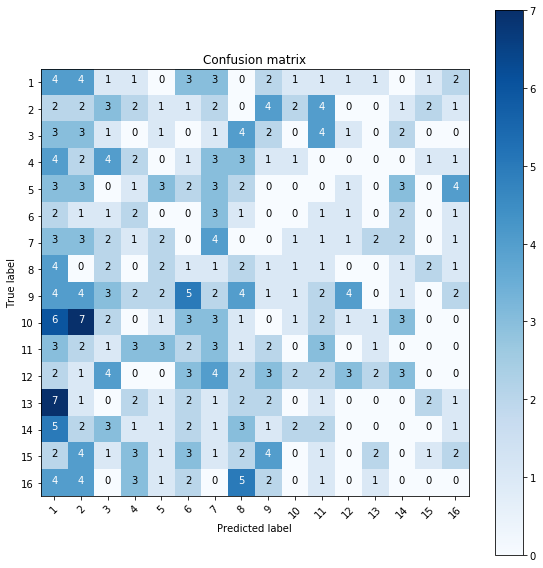

177 seconds


"\nif 'clf__metric' == ['seuclidean',], then ----TypeError: __init__() takes exactly 1 positional argument (0 given)\nif 'clf__metric' == ['seuclidean',] and 'clf__V' == [2,], then ----ValueError: Invalid parameter V for estimator KNeighborsClassifier.\nthe same to 'clf__metric' == ['mahalanobis', 'wminkowski',]\n"

In [4]:
from sklearn.neighbors import KNeighborsClassifier

starttime = datetime.now()

pipe_KNClassifier = Pipeline([('clf', KNeighborsClassifier(n_jobs=-1))])
param_KNClassifier = {'clf__n_neighbors': [10], #default = 5; Number of neighbors to use by default for kneighbors querie
                       'clf__weights': ['uniform', 'distance'], #default = uniform;  weight function used in prediction
                       #‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                       #‘distance’ : weight points by the inverse of their distance. in this case, 
                       #               closer neighbors of a query point will have a greater influence than neighbors which are further away.
                       #[callable]: a function which accepts an array of distances, returns an array of the same shape containing the weights.
                       'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], #default='auto'; Algorithm used to compute the nearest neighbors:
                       #‘ball_tree’ will use BallTree
                       #‘kd_tree’ will use KDTree
                       #‘brute’ will use a brute-force search.
                       #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
                       #Note:::: fitting on sparse input will override the setting of this parameter, using brute force.
                       'clf__leaf_size': [30, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__p': [2, 3], #default=2; Power parameter for the Minkowski metric.
                       #p = 1: using manhattan_distance (l1); p = 2: euclidean_distance (l2); arbitrary p, minkowski_distance (l_p)
                       'clf__metric': ['minkowski', 'chebyshev'], #default=minkowski; the distance metric to use for the tree
                       #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
                       #See the documentation of the sklearn.neighbors.DistanceMetric class for a list of available metrics.
                      #“euclidean”: sqrt(sum((x - y)^2))
                      #“manhattan”: sum(|x - y|)
                      #“chebyshev”: max(|x - y|)
                      #“minkowski”: sum(|x - y|^p)^(1/p)
                      #“wminkowski”: sum(w * |x - y|^p)^(1/p)
                      #“seuclidean”: sqrt(sum((x - y)^2 / V))
                      #“mahalanobis”: sqrt((x - y)' V^-1 (x - y))
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_classifier(pipe_KNClassifier, param_KNClassifier)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
'''
if 'clf__metric' == ['seuclidean',], then ----TypeError: __init__() takes exactly 1 positional argument (0 given)
if 'clf__metric' == ['seuclidean',] and 'clf__V' == [2,], then ----ValueError: Invalid parameter V for estimator KNeighborsClassifier.
the same to 'clf__metric' == ['mahalanobis', 'wminkowski',]
'''

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.5s finished


df_R0 [8] precison: [ 0.0723  0.0628  0.0681] recall: [ 0.0705  0.0665  0.0608] f1: [ 0.0706  0.0641  0.0614]
Pipeline(steps=[('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='distance'))])
             precision    recall  f1-score   support

          1       0.15      0.16      0.15        25
          2       0.09      0.07      0.08        27
          3       0.17      0.18      0.18        22
          4       0.11      0.09      0.10        23
          5       0.04      0.04      0.04        25
          6       0.06      0.13      0.08        15
          7       0.11      0.09      0.10        23
          8       0.03      0.05      0.04        19
          9       0.12      0.08      0.10        37
         10       0.07      0.03      0.04        31
         11       0.02      0.04      0.03        24
         12       0.14      0.10      0.12        31
      

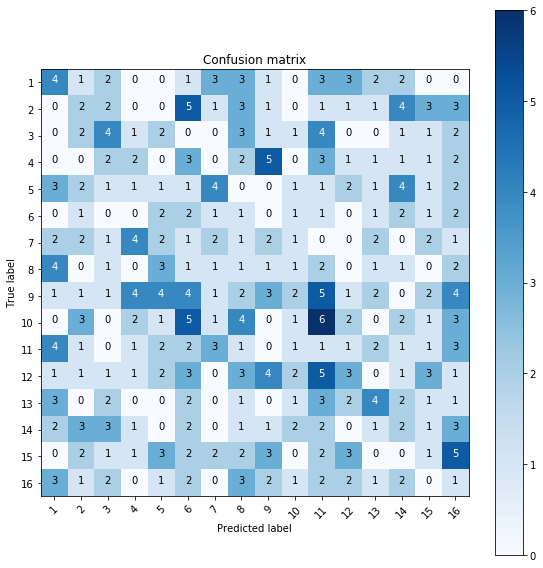

10 seconds


In [18]:
starttime = datetime.now()

param_KNClassifier = {'clf__n_neighbors': [10, ], #default = 5; Number of neighbors to use by default for kneighbors querie
                       'clf__weights': ['uniform', 'distance'], #default = uniform;  weight function used in prediction
                       #‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                       #‘distance’ : weight points by the inverse of their distance. in this case, 
                       #               closer neighbors of a query point will have a greater influence than neighbors which are further away.
                       #[callable]: a function which accepts an array of distances, returns an array of the same shape containing the weights.
                       'clf__algorithm': ['auto'], #default='auto'; Algorithm used to compute the nearest neighbors:
                       #‘ball_tree’ will use BallTree              
                       #‘kd_tree’ will use KDTree
                       #‘brute’ will use a brute-force search.
                       #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
                       #Note:::: fitting on sparse input will override the setting of this parameter, using brute force.
                       'clf__leaf_size': [30, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__p': [2, ], #default=2; Power parameter for the Minkowski metric.
                       #p = 1: using manhattan_distance (l1); p = 2: euclidean_distance (l2); arbitrary p, minkowski_distance (l_p)
                       'clf__metric': [ 'minkowski', ], #default=minkowski; the distance metric to use for the tree
                       #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
                       #See the documentation of the DistanceMetric class for a list of available metrics.
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_classifier(pipe_KNClassifier, param_KNClassifier)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    2.2  Nearest Neighbors RadiusNeighborsRegressor
'''



'''

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   21.9s finished


df_R0 [9] precison: [ 0.0775  0.0505  0.0577] recall: [ 0.078   0.0665  0.0623] f1: [ 0.0675  0.0516  0.0524]
Pipeline(steps=[('clf', RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=90,
             weights='uniform'))])
             precision    recall  f1-score   support

          1       0.08      0.08      0.08        25
          2       0.00      0.00      0.00        27
          3       0.10      0.05      0.06        22
          4       0.00      0.00      0.00        23
          5       0.07      0.08      0.08        25
          6       0.03      0.13      0.04        15
          7       0.05      0.04      0.05        23
          8       0.06      0.05      0.05        19
          9       0.12      0.11      0.11        37
         10       0.00      0.00      0.00        31
         11       0.15      0.25      0.19        24
         12       0.16      0.13      0.14     

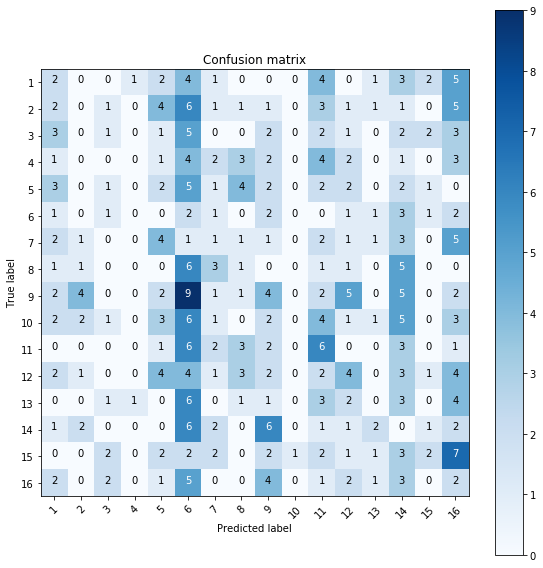

34 seconds


'\nyou can try using larger radius, give a label for outliers, or consider removing them from your dataset.\n'

In [33]:

from sklearn.neighbors import RadiusNeighborsClassifier

starttime = datetime.now()

pipe_RNClassifier = Pipeline([('clf', RadiusNeighborsClassifier())])
param_RNClassifier = {'clf__radius': [ 85, 90, 95], #default = 5; Number of neighbors to use by default for kneighbors querie
                       'clf__weights': ['uniform', 'distance'], #default = uniform;  weight function used in prediction
                       #‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                       #‘distance’ : weight points by the inverse of their distance. in this case, 
                       #               closer neighbors of a query point will have a greater influence than neighbors which are further away.
                       #[callable]: a function which accepts an array of distances, returns an array of the same shape containing the weights.
                       'clf__algorithm': ['auto', ], #default='auto'; Algorithm used to compute the nearest neighbors:
                       #‘ball_tree’ will use BallTree                     'ball_tree', 'kd_tree', 'brute'
                       #‘kd_tree’ will use KDTree
                       #‘brute’ will use a brute-force search.
                       #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
                       #Note:::: fitting on sparse input will override the setting of this parameter, using brute force.
                       'clf__leaf_size': [30, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__p': [2, ], #default=2; Power parameter for the Minkowski metric.
                       #p = 1: using manhattan_distance (l1); p = 2: euclidean_distance (l2); arbitrary p, minkowski_distance (l_p)
                       'clf__metric': ['minkowski', ], #default=minkowski; the distance metric to use for the tree
                       #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
                       #See the documentation of the DistanceMetric class for a list of available metrics.
                      'clf__outlier_label': [None, ], 
                      #Given for outliers(samples with no neighbors on given radius). If None, ValueError is raised when outlier is detected.
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_classifier(pipe_RNClassifier, param_RNClassifier)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')
'''
you can try using larger radius, give a label for outliers, or consider removing them from your dataset.
'''

In [ ]:
################    2.3  Nearest Neighbors NearestCentroid
'''
Each class is represented by its centroid, with test samples classified to the class with the nearest centroid.

'''

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.9s finished


df_R0 [10] precison: [ 0.0581  0.0524  0.069 ] recall: [ 0.0585  0.0529  0.0684] f1: [ 0.0578  0.0523  0.0683]
Pipeline(steps=[('clf', NearestCentroid(metric='euclidean', shrink_threshold=None))])
             precision    recall  f1-score   support

          1       0.11      0.12      0.11        25
          2       0.03      0.04      0.04        27
          3       0.00      0.00      0.00        22
          4       0.05      0.04      0.04        23
          5       0.08      0.08      0.08        25
          6       0.00      0.00      0.00        15
          7       0.04      0.04      0.04        23
          8       0.00      0.00      0.00        19
          9       0.10      0.05      0.07        37
         10       0.12      0.10      0.11        31
         11       0.00      0.00      0.00        24
         12       0.12      0.10      0.11        31
         13       0.10      0.09      0.09        22
         14       0.04      0.04      0.04        24
       

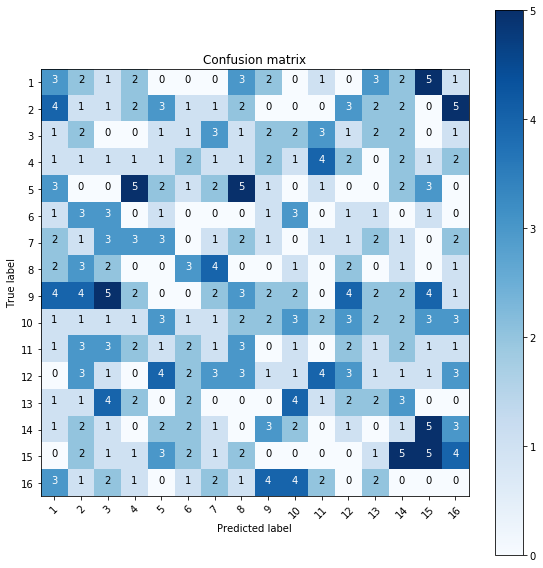

6 seconds


In [9]:

from sklearn.neighbors import NearestCentroid

starttime = datetime.now()

pipe_NearestCentroid = Pipeline([('clf', NearestCentroid())])
param_NearestCentroid = {'clf__metric': ['euclidean', 'manhattan'], #default=
                         #The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, 
                         #it must be one of the options allowed by metrics.pairwise.pairwise_distances for its metric parameter. 
                         #The centroids for the samples corresponding to each class is the point from which the sum of the distances 
                         #(according to the metric) of all samples that belong to that particular class are minimized. 
                         #If“manhattan”:this centroid is the median and for all other metrics, the centroid is now set to be the mean.
                         'clf__shrink_threshold': [None, ] #Threshold for shrinking centroids to remove features
                        }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    total_classifier(pipe_NearestCentroid, param_NearestCentroid)

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    3    Unsupervised learner
################    3.1  Nearest Neighbors Classifier
'''
 It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on 
 routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', 
 which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. 
 When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.

'''

In [ ]:
from sklearn.neighbors import NearestNeighbors

starttime = datetime.now()

param_NearestNeighbors = {'clf__n_neighbors': [5, ], #default = 5; Number of neighbors to use by default for kneighbors querie
                       'clf__radius': [1.0, ], #default = 1.0; Range of parameter space to use by default for radius_neighbors queries.
                       'clf__algorithm': ['auto', ], #default='auto'; Algorithm used to compute the nearest neighbors:
                       #‘ball_tree’ will use BallTree
                       #‘kd_tree’ will use KDTree
                       #‘brute’ will use a brute-force search.
                       #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
                       #Note:::: fitting on sparse input will override the setting of this parameter, using brute force.
                       'clf__leaf_size': [30, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__p': [2, ], #default=2; Power parameter for the Minkowski metric.
                       #p = 1: using manhattan_distance (l1); p = 2: euclidean_distance (l2); arbitrary p, minkowski_distance (l_p)
                       'clf__metric': ['minkowski', ], #default=minkowski; the distance metric to use for the tree
                       #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
                       #See the documentation of the DistanceMetric class for a list of available metrics.
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    NN = NearestNeighbors(n_jobs=-1).set_params(**param_NearestNeighbors)
    NN.fit(df_.values)
    NN.kneighbors([new_X, n_neighbors, return_distance])
    NN.kneighbors_graph([X, n_neighbors, mode])
    #NN.radius_neighbors([X, n_neighbors, return_distance])
    #NN.radius_neighbors_graph([X, radius, mode])
endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')

In [ ]:
################    4    Generator
################    4.1  Nearest Neighbors KernelDensity
'''
 It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on 
 routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', 
 which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. 
 When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.

'''

'''
No, estimator.predict();
only estimator.sample()
'''

In [ ]:
from sklearn.neighbors import KernelDensity

starttime = datetime.now()

param_KernelDensity = {'clf__bandwidth': [1.0, ], #default = 1.0; The bandwidth of the kernel.
                       'clf__algorithm': ['auto', ], #default='auto'; The tree algorithm to use. ‘kd_tree’|’ball_tree’|’auto’
                       'clf__kernel': ['gaussian', ], #default = gaussian; 'gaussian, tophat, epanechnikov, exponential, linear, cosine'
                       'clf__metric': ['euclidean', ], #default=euclidean; the distance metric to use for the tree
                       #Not all metrics are valid. Refer to the documentation of BallTree and KDTree for  available algorithms. 
                       #Note that the normalization of the density output is correct only for the Euclidean distance metric.
                       'clf__atol': [0, ], #default=0; 
                       #The desired absolute tolerance of the result. A larger tolerance will generally lead to faster execution
                       'clf__rtol': [0, ], #default=1E-8;  ???
                       #The desired relative tolerance of the result. A larger tolerance will generally lead to faster execution. 
                       'clf__breadth_first': [True, ], #default=True;
                       #If true (default), use a breadth-first approach to the problem. Otherwise use a depth-first approach.
                       'clf__leaf_size': [40, ] , #default=30; Leaf size passed to BallTree or KDTree. 
                       #This can affect the speed of the construction and query, as well as the memory required to store the tree. 
                       #The optimal value depends on the nature of the problem.
                       'clf__metric_params': [None, ] #default=; Additional keyword arguments for the metric function.
                      }
for i in range(0,1):
    df_ =  locals()['df_sr'+ str(i)]
    KD = KernelDensity().set_params(**param_KernelDensity)
    KD.fit(X)
    KD.sample([n_samples, random_state])       #default: n_samples=1; return new_X;  #Generate random samples from the model.
    KD.score(X[, y])                    #retrun logprob;  Total log-likelihood of the data in X;  Compute logprob under the model.
    KD.score_samples(X)        #return density(n_samples,), The array of log(density) evaluations. Evaluate the density model on the data.

endtime = datetime.now()
Time = endtime - starttime
print(Time.seconds, 'seconds')